In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

sns.set_theme()

In [210]:
df = pd.read_csv('credit_train.csv')
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
38424,583cee5a-940a-42c3-b536-261bd0209635,9e950d60-a90e-4ac7-b27c-eb6027d1e5a0,Fully Paid,107712,Short Term,725.0,1209312.0,7 years,Rent,other,7649.02,23.0,NaN,7,0,254752,310200.0,0.0,0.0
82561,7ab4a46a-5041-42d1-9a83-7787717d602b,eb117814-81e8-4d64-b94d-e37bc3a291e1,Fully Paid,99999999,Short Term,734.0,528010.0,9 years,Rent,Debt Consolidation,5368.07,10.1,NaN,8,0,106932,207416.0,0.0,0.0
96403,a9a3ae09-9243-4a86-920a-83ecaa3d97a1,54f8e3c0-73e3-4d91-af88-622089f8b610,Fully Paid,173690,Short Term,749.0,468787.0,1 year,Own Home,Debt Consolidation,11055.34,12.0,NaN,11,0,84246,382558.0,0.0,0.0
47602,67124c6e-e835-4d5f-a78c-c93d61628a82,3e265c65-d4d0-4b14-b25d-28fcf70ba871,Fully Paid,512754,Long Term,722.0,1012206.0,10+ years,Home Mortgage,Debt Consolidation,14676.93,23.5,NaN,10,0,440990,883432.0,0.0,0.0
73534,b32fb5fb-b63c-4462-899a-754a56f603e6,ed071c8a-6409-4d41-a1f7-3f09588d9e44,Fully Paid,99999999,Short Term,750.0,1658282.0,10+ years,Home Mortgage,Other,33718.54,25.5,NaN,12,0,72884,639386.0,0.0,0.0


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [212]:
num_cols = [
    'Current Loan Amount',
    'Credit Score',
    'Annual Income',
    'Monthly Debt',
    'Years of Credit History',
    'Months since last delinquent',
    'Number of Open Accounts',
    'Number of Credit Problems',
    'Current Credit Balance',
    'Maximum Open Credit', 
    'Bankruptcies', 
    'Tax Liens'
]
cat_cols = [
    'Term',
    'Years in current job',
    'Home Ownership', 
    'Purpose'
]

target = ['Loan Status']

features = num_cols + cat_cols

In [213]:
df['Loan Status'].value_counts()

Loan Status
Fully Paid     77361
Charged Off    22639
Name: count, dtype: int64

In [214]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [215]:
df = df[features + target]
df

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose,Loan Status
0,445412,709.0,1167493.0,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0,Short Term,8 years,Home Mortgage,Home Improvements,Fully Paid
1,262328,NaN,NaN,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0,Short Term,10+ years,Home Mortgage,Debt Consolidation,Fully Paid
2,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0,Short Term,8 years,Own Home,Debt Consolidation,Fully Paid
3,347666,721.0,806949.0,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0,Long Term,3 years,Own Home,Debt Consolidation,Fully Paid
4,176220,NaN,NaN,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0,Short Term,5 years,Rent,Debt Consolidation,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070,725.0,475437.0,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0,Short Term,7 years,Own Home,other,Fully Paid
99996,99999999,732.0,1289416.0,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0,Short Term,1 year,Rent,Debt Consolidation,Fully Paid
99997,103136,742.0,1150545.0,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0,Short Term,6 years,Rent,Debt Consolidation,Fully Paid
99998,530332,746.0,1717524.0,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0,Short Term,9 years,Rent,Debt Consolidation,Fully Paid


In [216]:
df['Credit Score'][df['Credit Score'].isna()] = df['Credit Score'].median()
df['Annual Income'][df['Annual Income'].isna()] = df['Annual Income'].median()
df['Months since last delinquent'][df['Months since last delinquent'].isna()] = \
    df['Months since last delinquent'].median()

indexies = df['Years in current job'].isna()
df['Years in current job'][indexies] = '5 years'

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99794 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           99794 non-null  int64  
 1   Credit Score                  99794 non-null  float64
 2   Annual Income                 99794 non-null  float64
 3   Monthly Debt                  99794 non-null  float64
 4   Years of Credit History       99794 non-null  float64
 5   Months since last delinquent  99794 non-null  float64
 6   Number of Open Accounts       99794 non-null  int64  
 7   Number of Credit Problems     99794 non-null  int64  
 8   Current Credit Balance        99794 non-null  int64  
 9   Maximum Open Credit           99794 non-null  float64
 10  Bankruptcies                  99794 non-null  float64
 11  Tax Liens                     99794 non-null  float64
 12  Term                          99794 non-null  object 
 13  Years 

In [217]:
df[target] = df[target].replace(['Fully Paid', 'Charged Off'], [0, 1]);

In [218]:
for feat in cat_cols:
    df[feat] = df[feat].factorize()[0]

In [1]:
fig, ax = plt.subplots(4, 3)

fig.set_figheight(18)
fig.set_figwidth(14)

for i in range(4):
    for j in range(3):
        ax[i][j].hist(df[df.columns[i * 3 + j]])
        ax[i][j].set_title(df.columns[i * 3 + j])

NameError: name 'plt' is not defined

In [220]:
for col_counter in range(1):
    column = df[df.columns[col_counter]]
    median = column.median()  
    Q1, Q3 = column.quantile([0.25, 0.75]) 
    IQR = Q3 - Q1
    left_treshold, right_treshold = median - 1.5 * IQR, median + 1.5 * IQR
    df = df[(column >= left_treshold) & (column <= right_treshold)]

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88337 entries, 0 to 99998
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88337 non-null  int64  
 1   Credit Score                  88337 non-null  float64
 2   Annual Income                 88337 non-null  float64
 3   Monthly Debt                  88337 non-null  float64
 4   Years of Credit History       88337 non-null  float64
 5   Months since last delinquent  88337 non-null  float64
 6   Number of Open Accounts       88337 non-null  int64  
 7   Number of Credit Problems     88337 non-null  int64  
 8   Current Credit Balance        88337 non-null  int64  
 9   Maximum Open Credit           88337 non-null  float64
 10  Bankruptcies                  88337 non-null  float64
 11  Tax Liens                     88337 non-null  float64
 12  Term                          88337 non-null  int64  
 13  Years 

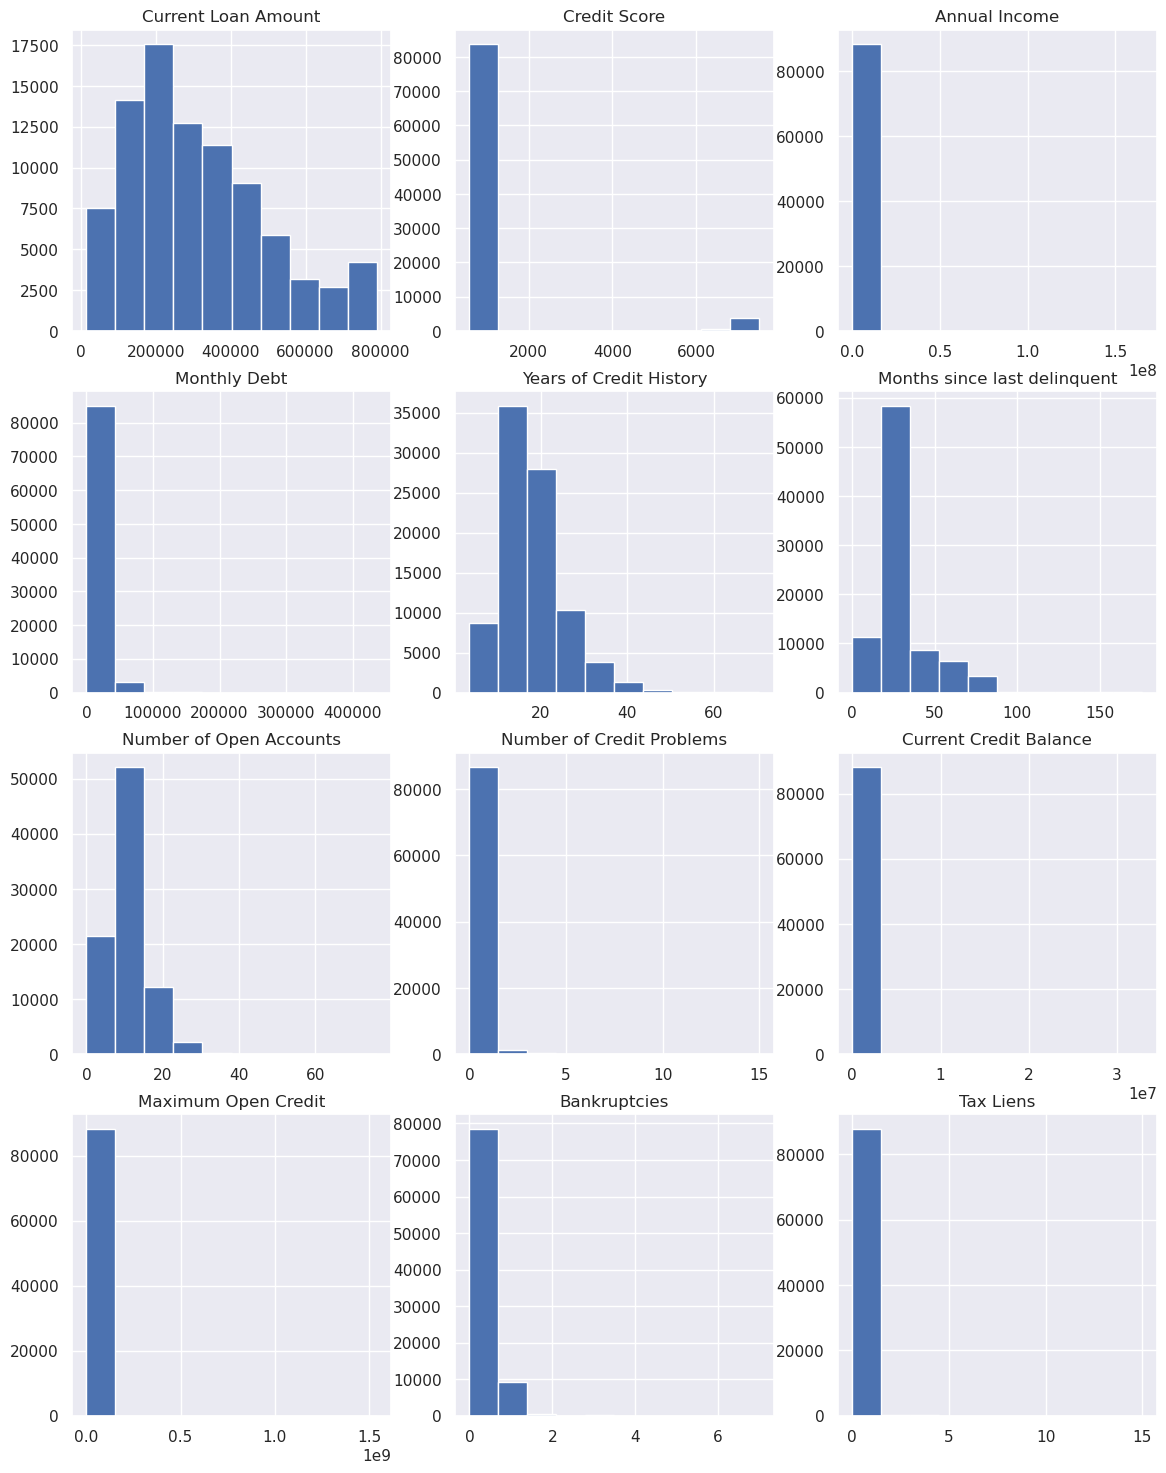

In [222]:
fig, ax = plt.subplots(4, 3)

fig.set_figheight(18)
fig.set_figwidth(14)


for i in range(4):
    for j in range(3):
        ax[i][j].hist(df[df.columns[i * 3 + j]])
        ax[i][j].set_title(df.columns[i * 3 + j])

In [335]:
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[target], 
                                                     train_size=0.6)


In [336]:
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [337]:
model = XGBClassifier(reg_lambda=0.5, n_estimators=100)
model.fit(X_train, Y_train);


In [202]:
pred = model.predict_proba(X_test)


roc_auc_score(Y_test, pred[:, 1])

0.714238012544927

In [203]:
cat_model = CatBoostClassifier(cat_features=cat_cols, iterations=3000, learning_rate=0.9, max_depth=8)

In [204]:
cat_model.fit(X_train, Y_train)

0:	learn: 0.4847211	total: 90.4ms	remaining: 4m 31s
1:	learn: 0.4756550	total: 127ms	remaining: 3m 10s
2:	learn: 0.4722883	total: 160ms	remaining: 2m 40s
3:	learn: 0.4709054	total: 191ms	remaining: 2m 23s
4:	learn: 0.4680221	total: 226ms	remaining: 2m 15s
5:	learn: 0.4660503	total: 260ms	remaining: 2m 9s
6:	learn: 0.4643551	total: 292ms	remaining: 2m 5s
7:	learn: 0.4635122	total: 329ms	remaining: 2m 2s
8:	learn: 0.4618737	total: 366ms	remaining: 2m 1s
9:	learn: 0.4610269	total: 396ms	remaining: 1m 58s
10:	learn: 0.4596072	total: 436ms	remaining: 1m 58s
11:	learn: 0.4576860	total: 466ms	remaining: 1m 56s
12:	learn: 0.4567067	total: 500ms	remaining: 1m 54s
13:	learn: 0.4547238	total: 537ms	remaining: 1m 54s
14:	learn: 0.4528981	total: 567ms	remaining: 1m 52s
15:	learn: 0.4514849	total: 605ms	remaining: 1m 52s
16:	learn: 0.4501177	total: 638ms	remaining: 1m 51s
17:	learn: 0.4491771	total: 676ms	remaining: 1m 51s
18:	learn: 0.4481728	total: 730ms	remaining: 1m 54s
19:	learn: 0.4460682	tota

163:	learn: 0.3026427	total: 6.05s	remaining: 1m 44s
164:	learn: 0.3018323	total: 6.08s	remaining: 1m 44s
165:	learn: 0.3003606	total: 6.12s	remaining: 1m 44s
166:	learn: 0.2998374	total: 6.16s	remaining: 1m 44s
167:	learn: 0.2983759	total: 6.21s	remaining: 1m 44s
168:	learn: 0.2973943	total: 6.27s	remaining: 1m 45s
169:	learn: 0.2964426	total: 6.33s	remaining: 1m 45s
170:	learn: 0.2960323	total: 6.37s	remaining: 1m 45s
171:	learn: 0.2956063	total: 6.41s	remaining: 1m 45s
172:	learn: 0.2951098	total: 6.45s	remaining: 1m 45s
173:	learn: 0.2948473	total: 6.49s	remaining: 1m 45s
174:	learn: 0.2948324	total: 6.54s	remaining: 1m 45s
175:	learn: 0.2943469	total: 6.6s	remaining: 1m 45s
176:	learn: 0.2938265	total: 6.64s	remaining: 1m 45s
177:	learn: 0.2928886	total: 6.68s	remaining: 1m 45s
178:	learn: 0.2917132	total: 6.72s	remaining: 1m 45s
179:	learn: 0.2910018	total: 6.75s	remaining: 1m 45s
180:	learn: 0.2900620	total: 6.79s	remaining: 1m 45s
181:	learn: 0.2893072	total: 6.82s	remaining: 1

KeyboardInterrupt: 

In [ ]:
cat_pred = cat_model.predict_proba(X_test)

In [ ]:
roc_auc_score(Y_test, cat_pred[:, 1])

In [ ]:
np.unique(cat_pred, return_counts=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
precision_score(Y_test, cat_pred)

In [ ]:
from supervised.automl import AutoML

In [ ]:
model = AutoML(
    mode="Compete", 
    eval_metric="auc",
    model_time_limit=1*60,
    total_time_limit=5*60,
    top_models_to_improve=3,
    start_random_models=5,
    hill_climbing_steps=0,
    features_selection=True,
    golden_features=False,
    stack_models=True,
    train_ensemble=True,
    validation_strategy={
        "validation_type": "kfold",
        "k_folds": 3,
        "shuffle": True,
        "stratify": True,
    },
    algorithms=['Random Forest', 'Extra Trees', 'Xgboost', 'CatBoost']

)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
pred=model.predict_proba(X_test)
roc_auc_score(Y_test, pred[:, 1])

In [239]:
for i in cat_cols:
    df[i] = df[i].factorize()[0]

/tmp/ipykernel_26396/3983740466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].factorize()[0]


In [ ]:
model.fit(X_train, Y_train)

In [ ]:
len(df.columns)

In [338]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [339]:
X_train_ten = torch.FloatTensor(X_train)
Y_train_ten = torch.FloatTensor(Y_train.to_numpy())

X_test_ten = torch.FloatTensor(X_test)
Y_test_ten = torch.FloatTensor(Y_test.to_numpy())

In [340]:
train_dataloader = DataLoader(TensorDataset(X_train_ten, Y_train_ten), batch_size=1000, shuffle=True)

test_dataloader = DataLoader(TensorDataset(X_test_ten, Y_test_ten), batch_size=1000, shuffle=False)

In [359]:
class CustomNet(nn.Module):
    
    def __init__(self,*, n_input, n_hidden):
        super().__init__()
        self.linear1 = nn.Linear(n_input, n_hidden)
        self.linear2 = nn.Linear(n_hidden, n_hidden)
        self.linear3 = nn.Linear(n_hidden, n_hidden)
        self.linear4 = nn.Linear(n_hidden, 1)
        self.dropout = nn.Dropout(0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden)
        self.batchnorm3 = nn.BatchNorm1d(n_hidden)
        self.act = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.act(out)
        out = self.batchnorm1(out)
        #out = self.dropout(out)
        out = self.linear2(out)
        out = self.act(out)
        out = self.batchnorm2(out)
        #out = self.dropout(out)
        out = self.linear3(out)
        out = self.batchnorm3(out)
        #out = self.dropout(out)
        out = self.act(out)
        out = self.linear4(out)
        
        out = self.sigmoid(out)
        return out

In [360]:
model_net = CustomNet(n_input = 16, 
                      n_hidden = 500)

In [377]:
epochs = 50
lr = 0.3
optim = torch.optim.Adam(model_net.parameters(), lr=lr)
loss_function = nn.BCELoss()


In [378]:
def train(dataloader, net, criterion, optimizer):
    net.train()
    total_loss = 0
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()
        y_pred = net(x_batch)
        loss = criterion(y_pred, y_batch)
        
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss / len(dataloader)


def validation(dataloader, net, criterion):
    net.eval()
    total_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            y_pred = net(x_batch)
            loss = criterion(y_pred, y_batch)

            total_loss += loss.item()
    return total_loss / len(dataloader)

In [379]:
from IPython.display import clear_output
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

q

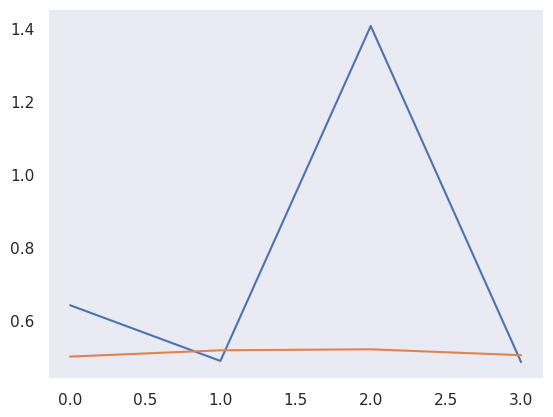

KeyboardInterrupt: 

In [380]:
train_loss_arr = []
val_loss_arr = []
for i in range(epochs):
    trn = train(train_dataloader, model_net, loss_function, optim)
    val = validation(test_dataloader, model_net, loss_function)

    train_loss_arr.append(trn)
    val_loss_arr.append(val)
    
    clear_output(True)
    plt.plot(train_loss_arr)
    plt.plot(val_loss_arr)
    plt.grid()
    plt.show()
        

In [ ]:
roc_auc_score(Y_train_ten, model_net(X_train_ten).detach())